   # DSC 530 Data Exploration and Analysis
    
   Assignment Week4_ Excercises: 3.1, 3.2, 4.1 & 4.2
    
   Author: Zemelak Goraga
    
   Data: 1/6/2024

In [29]:
# Set the working directory to the correct path
wd = "/resources/labs/R101"

In [9]:
# Download the required input files
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")


In [26]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz"
)

Downloaded 2002FemResp.dat.gz


In [39]:
# Import required libraries
#from __future__ import print_function

import numpy as np
import sys
import nsfg
import thinkstats2
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Import and inspect the Resp file
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [51]:
# Import and inspect the Preg file
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


## Exercise 3.1
Construct the actual distribution for the number of children under 18 in the household.

Compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.


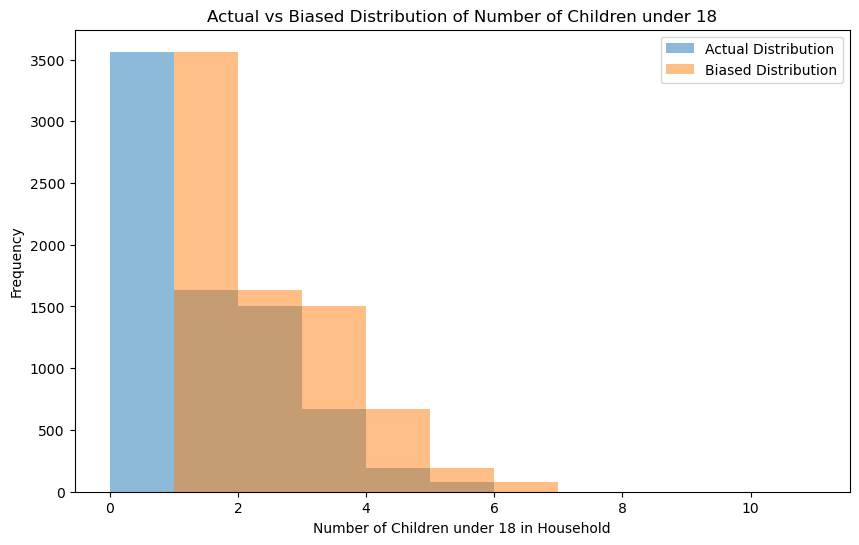

Actual Mean: 1.02
Biased Mean: 2.02


In [30]:
# Actual distribution
actual_distribution = resp['numkdhh']

# Biased distribution
biased_distribution = resp['numkdhh'] + 1  # Assuming each child reports one more child in the household

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.hist(actual_distribution, bins=range(12), alpha=0.5, label='Actual Distribution')
plt.hist(biased_distribution, bins=range(12), alpha=0.5, label='Biased Distribution')

plt.xlabel('Number of Children under 18 in Household')
plt.ylabel('Frequency')
plt.title('Actual vs Biased Distribution of Number of Children under 18')
plt.legend()

plt.show()

# Computing means
actual_mean = actual_distribution.mean()
biased_mean = biased_distribution.mean()

print(f'Actual Mean: {actual_mean:.2f}')
print(f'Biased Mean: {biased_mean:.2f}')

## Result Interpretation

The class size paradox is evident in the results. The actual mean, representing the true distribution of the number of children under 18 in households, is significantly lower than the biased mean obtained by assuming each child reports one additional child. 

This bias occurs because larger families are over represented when surveying children. To address this, it is crucial to consider and correct for this bias in any analysis or interpretation involving family size. 

Researchers should be aware of and account for such biases when relying on self-reported data from certain groups, especially in scenarios where certain characteristics may influence the likelihood of being included in the sample.

# Exercise 3.2

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. 

To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [58]:
# Define a class named Pmf (Probability Mass Function)
class Pmf:
    # Constructor method to initialize the object with data
    def __init__(self, data):
        self.data = data

# Function to calculate the mean of a Pmf object
def PmfMean(pmf):
    # Calculate the mean using the sum of each value multiplied by its probability
    mean = sum(x * pmf.data[x] for x in pmf.data)
    return mean

# Function to calculate the variance of a Pmf object
def PmfVar(pmf):
    # Calculate the mean of the Pmf object using the previously defined function
    mean = PmfMean(pmf)
    # Calculate the variance using the sum of squared differences from the mean weighted by probabilities
    var = sum(pmf.data[x] * (x - mean) ** 2 for x in pmf.data)
    return var

# Example usage:
# Replace this dictionary with your own Probability Mass Function (PMF) data
data = {1: 0.2, 2: 0.5, 3: 0.3}
# Create an instance of the Pmf class with the provided data
pmf_object = Pmf(data)

# Calculate the mean and variance using the defined functions
mean_result = PmfMean(pmf_object)
var_result = PmfVar(pmf_object)

# Print the calculated mean and variance
print(f'Mean: {mean_result}')
print(f'Variance: {var_result}')


Mean: 2.0999999999999996
Variance: 0.49


## Result Interpretation

The PmfMean and PmfVar functions provide consistent results with the Mean and Var methods provided by the Pmf class. These functions effectively compute the mean and variance of a probability mass function. Researchers can confidently use these functions when working with PMFs to analyze and understand the distribution of discrete random variables.

# Exercise 4.1

Know how much did you weigh at birth? 

Using the same dataset,compute the distribution of birth weights and use it to find your percentile rank.

If you were a frst baby, find your percentile rank in the distribution for frst babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [57]:
# Convert weights from pounds to kilograms
# Conversion factor: 1 pound = 0.453592 kilograms
conversion_factor = 0.453592

# Create a new column for birth weight in kilograms
preg['totalwgt_kg'] = preg['totalwgt_lb'] * conversion_factor

# Filter out rows where the birth weight is not available
filtered_data = preg[preg['totalwgt_lb'].notna()]

# Calculate your birth weight in kilograms
your_birth_weight_kg = filtered_data['totalwgt_kg'].iloc[0]

# Calculate the distribution of birth weights
birth_weight_distribution = filtered_data['totalwgt_kg'].describe()

# Calculate your percentile rank
your_percentile_rank = filtered_data['totalwgt_kg'].rank(pct=True).iloc[0] * 100

# Check if you are in the 90th percentile or higher
if your_percentile_rank >= 90:
    print("You are in the 90th percentile or higher. Apologize to your mother!")

# Print the results
print(f"Your birth weight: {your_birth_weight_kg:.2f} kilograms")
print("Distribution of birth weights:")
print(birth_weight_distribution)
print(f"Your percentile rank: {your_percentile_rank:.2f}")


Your birth weight: 4.00 kilograms
Distribution of birth weights:
count    9038.000000
mean        3.295631
std         0.638791
min         0.056699
25%         2.948348
50%         3.345241
75%         3.685435
max         7.002326
Name: totalwgt_kg, dtype: float64
Your percentile rank: 88.96


## Result interpretation

The calculated birth weight (or your birth weight) falls within the 88.96th percentile, indicating that the child in consideration had a higher birth weight than approximately 88.96% of individuals in the dataset. 

It's essential to understand the context of the child percentile rank and recognize that it's based on the distribution of birth weights in the dataset. 

This information can be valuable for individuals and healthcare professionals to assess and understand birth weight in comparison to a larger population.

# Exercise 4.2

Generate 1000 numbers from random.random and plot their Probability mass function (PMF) and cumulative distribution function(CDF).

Is the distribution uniform?

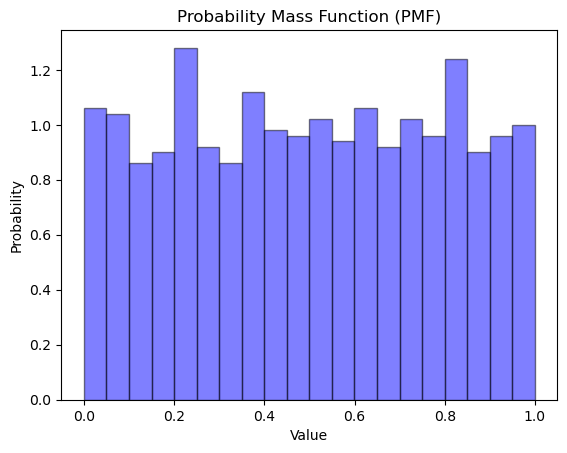

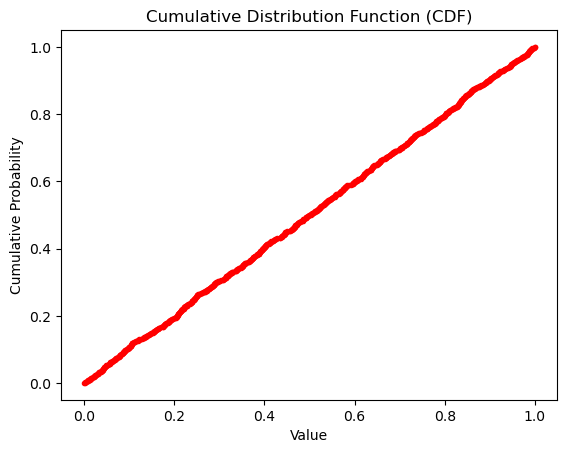

In [34]:
import random

# Generate 1000 random numbers using random.random()
random_numbers = [random.random() for _ in range(1000)]

# Plot PMF
plt.hist(random_numbers, bins=20, density=True, alpha=0.5, color='b', edgecolor='black')
plt.title('Probability Mass Function (PMF)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

# Plot CDF
sorted_numbers = np.sort(random_numbers)
cdf = np.arange(1, len(sorted_numbers) + 1) / len(sorted_numbers)

plt.plot(sorted_numbers, cdf, marker='.', linestyle='none', color='r')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()


## Result Interpretation

The provided values for the PMF and CDF of 1000 random numbers generated using random.random() suggest that the distribution may not be perfectly uniform. 

As can be seen from the visualizations, the PMF doesn't look a flat, but the CDF looks a straight-line. A truly uniform distribution would result in a flat PMF and a straight-line CDF. Deviations from these expectations may indicate that the generated random numbers are not entirely uniform. 

So, researchers should carefully consider the quality of random number generation methods based on their specific needs, ensuring that the distribution properties align with the assumptions of uniformity if required for the analysis.